In [52]:
import os
import sys
import csv
# import ast
from glob import glob
import json
from datetime import datetime, timedelta
import numpy as np
import pandas as pd


# import HomeDataClasses as HD
from my_functions import *

## parameters and packages for plotting with seaborn, matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize']=(8, 6)
sns.set()
sns.set_context()
sns.set_palette(sns.color_palette("deep"))

In [146]:
path = '/Volumes/TOSHIBA-18/H6-black/'

home_system = os.path.basename(path.strip('/'))
H = home_system.split('-')
H_num, color = H[0], H[1][0].upper()

hubs = mylistdir(path, bit=f'{color}S', end=False)
hub = hubs[1]

full_file = glob(os.path.join(path, hub, 'processed_env', '*_full_cleaned.csv'))[0]

df = pd.read_csv(full_file)
df.timestamp = pd.to_datetime(df.timestamp)
print(df.head())

            timestamp  tvoc_ppb  temp_c  rh_percent  light_lux  co2eq_ppm  \
0 2019-10-09 21:25:00       0.0    27.4        27.6      101.0      400.0   
1 2019-10-09 21:25:10       0.0    27.4        27.5      101.0      400.0   
2 2019-10-09 21:25:20       0.0    27.4        27.5      101.0      400.0   
3 2019-10-09 21:25:30       0.0    27.4        27.4      101.0      400.0   
4 2019-10-09 21:25:40       0.0    27.4        27.4      101.0      400.0   

   dist_mm  hub  Modified_temp_c  Modified_rh_percent  Modified_tvoc_ppb  \
0   3378.0  BS3              0.0                  0.0                0.0   
1   3338.0  BS3              0.0                  0.0                0.0   
2   3209.0  BS3              0.0                  0.0                0.0   
3   3273.0  BS3              0.0                  0.0                0.0   
4   3327.0  BS3              0.0                  0.0                0.0   

   Modified_co2eq_ppm  Modified_light_lux  Modified_dist_mm  
0                 

In [177]:
sns.set(font_scale = 2.3, style="whitegrid")
# fontsize=fnt_sze
start_date = '2019-11-03 00:00:00'
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = start_date + timedelta(days=1)
small_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] < end_date)]




def plot_mod(df, y_mod = '', ylab = '', y_lim=None, save=True, fnt_sze=32):
    
    ax = sns.lineplot(x='timestamp', y=y_mod, data=df)
    plt.xlabel('Time')
    plt.ylabel(ylab)#, fontsize=fnt_sze)
    plt.title(start_date.strftime("%Y-%m-%d"))#, fontsize=fnt_sze)

    if y_lim != None:
        ax.set(xlim=(df['timestamp'].min(), df['timestamp'].max()), ylim=y_lim)
    else:
        ax.set(xlim=(df['timestamp'].min(), df['timestamp'].max()))

    date_form = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation=45)
    plt.tight_layout()
#     plt.show()

    if save:
        target_fname = f'{H_num}-{hub}-{start_date.strftime("%m%d")}_{y_mod}.pdf'
        target_dir = make_storage_directory(f'/Users/maggie/Desktop/STPN_env_plots/')
        plt.savefig(os.path.join(target_dir, target_fname))
    else:
        plt.show()
    
    plt.clf()


plot_mod(small_df, y_mod = 'temp_c', ylab = 'Temperature (C)', y_lim=(20, 30))
plot_mod(small_df, y_mod = 'rh_percent', ylab = 'Relative Humidity (%)')
plot_mod(small_df, y_mod = 'tvoc_ppb', ylab = 'TVOC (ppb)')
plot_mod(small_df, y_mod = 'co2eq_ppm', ylab = 'CO2 (ppm)')
plot_mod(small_df, y_mod = 'light_lux', ylab = 'Luminance (lux)')
plot_mod(small_df, y_mod = 'dist_mm', ylab = 'Distance (mm)')

<Figure size 576x432 with 0 Axes>

In [179]:
occ_file = glob(os.path.join(path, 'Inference_DB', 'Full_inferences', '*_occupancy.csv'))[0]
occ = pd.read_csv(occ_file)
occ.timestamp = pd.to_datetime(occ.timestamp)

small_occ = occ[(occ['timestamp'] >= start_date) & (occ['timestamp'] < end_date)]
sns.set(font_scale = 2.3, style="white")

plot_mod(small_occ, y_mod = 'Maggie', ylab = 'Occupied')

# ax = small_occ.plot(y='Maggie', legend=False)

<Figure size 576x432 with 0 Axes>

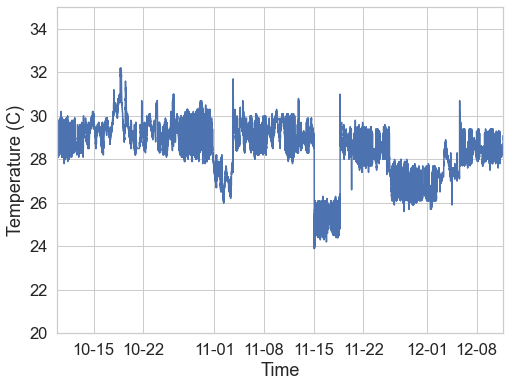

In [67]:
ax = sns.lineplot(x='timestamp', y='temp_c', data=df)#, linewidth=0.0005, height=6, aspect=2.7, s=20)
ax.set(xlim=(df['timestamp'].min(), df['timestamp'].max()), ylim=(20,35))
plt.xlabel('Time')
plt.ylabel('Temperature (C)')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()


                  timestamp  Maggie  occupied
0       2019-10-09 17:00:00       1         1
1       2019-10-09 17:00:10       1         1
2       2019-10-09 17:00:20       1         1
3       2019-10-09 17:00:30       1         1
4       2019-10-09 17:00:40       1         1
...                     ...     ...       ...
543926  2019-12-11 15:54:20       0         0
543927  2019-12-11 15:54:30       0         0
543928  2019-12-11 15:54:40       0         0
543929  2019-12-11 15:54:50       0         0
543930  2019-12-11 15:55:00       1         1

[543931 rows x 3 columns]


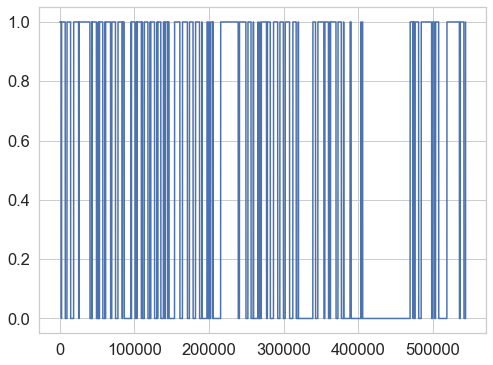

In [156]:
occ_file = glob(os.path.join(path, 'Inference_DB', 'Full_inferences', '*_occupancy.csv'))[0]

occ = pd.read_csv(occ_file)

print(occ)


start_date = '2019-11-03 00:00:00'
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = start_date + timedelta(days=1)
# small_occ = df[(df['timestamp'] >= start_date) & (df['timestamp'] < end_date)]


ax = occ.plot(y='Maggie', legend=False)
#         highlight(D, df, ax)
#         plt.savefig(f'/Users/maggie/Documents/ASEN-6519-Decision-Making-under-Uncertainty/project_file/{name}_{x}.png

In [ ]:
D = 21

def plot_occ(df):
    df['Date'] = pd.to_datetime(df.index)         
    df = df.set_index('Date')
#     dfs = []
#     day1 = df.index[0]
#     day_start = df.day[0]
#     num_weeks = int(np.ceil(len(df)/(24*D)))
#     print('{} time periods of {} days'.format(num_weeks, D))
    
#     if day_start > 0:
#         print(int(24*(7-day_start)))
#         day1 = day1 + timedelta(days = int(D-day_start))
#         df1 = df.loc[(df.index <= day1)]
#         dfs.append(df1)
    
#     for i in range(num_weeks):
#         dayf = day1 + timedelta(days = D*i)
#         dayn = day1 + timedelta(days = D*(i+1))
#         print(dayf, dayn)
#         dfn = df.loc[(df.index >= dayf) & (df.index < dayn)]
#         dfs.append(dfn)
    return dfs
